In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from pandas.plotting import table
import seaborn as sns; sns.set(style="white", color_codes=True)
import six, os

cb = '#668fac'
co = '#f8a867'
cg = '#a7c86a'
cr = '#f1808b'
cbl = '#737373'
cy = '#ffd11a'


In [69]:
#Вводим данные по тарифу и временной промежуток выгрузки данных
tf = 872

#df = pd.read_excel('input.xlsx', sep = ';', decimal=",", usecols = ['Дата','Время','Вид услуги',
 #   'Местонахождение при использовании услуги','Объём услуги','Единицы измерения','Стоимость, руб.'])

df = pd.read_excel('input.xlsx')
#df.loc(['Вид услуги'] == 'Включайся! Смотри 2.18')
df.head()

,Аб. номер,Тип лицевого счета,Номер лицевого счета,Номер устройства (IMEI),Дата,Время,Вид услуги,"Набранный номер, точка доступа",Местонахождение при использовании услуги,Объём услуги,Единицы измерения,"Стоимость, руб."
0,NaN,основной,NaN,NaN,01.11.2019,00:22:59,Мобильный интернет 4G,NaN,Москва,24.0,Килобайт,0.0
1,NaN,основной,NaN,NaN,01.11.2019,01:38:48,Мобильный интернет 4G,NaN,Москва,1785.0,Килобайт,0.0
2,NaN,основной,NaN,NaN,01.11.2019,02:03:01,Мобильный интернет 4G,NaN,Москва,3051.0,Килобайт,0.0
3,NaN,основной,NaN,NaN,01.11.2019,02:03:01,Мобильный интернет 4G,NaN,Москва,187.0,Килобайт,0.0
4,NaN,основной,NaN,NaN,01.11.2019,02:29:43,Мобильный интернет 4G,NaN,Москва,45.0,Килобайт,0.0


In [3]:
#Определяем врменной промежуток отчета
from datetime import datetime
from dateutil import relativedelta

df['Дата']= pd.to_datetime(df['Дата'], dayfirst=True) 
date1 = df['Дата'].min()
date2 = df['Дата'].max()

r = relativedelta.relativedelta(date2, date1)
if (r.days > 15):
    ds = r.months + 1

In [4]:
#Общие сведения
print('Всего потрачено на оплату связи: '+str(df['Стоимость, руб.'].sum())[:4]+' руб.')
#print('При ежемесячном тарифе: '+str(tf)+' руб., ')
      
print('Cредний чек в месяц: '+ str(df['Стоимость, руб.'].sum()/ds)[:4]+' руб.')


Всего потрачено на оплату связи: 8878 руб.
Cредний чек в месяц: 1775 руб.


In [40]:
#df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')
#df = df.set_index('Дата')
df.tail(2)

,Аб. номер,Тип лицевого счета,Номер лицевого счета,Номер устройства (IMEI),Время,Вид услуги,"Набранный номер, точка доступа",Местонахождение при использовании услуги,Объём услуги,Единицы измерения,"Стоимость, руб."
Дата,,,,,,,,,,,
2020-03-31,NaN,основной,NaN,NaN,23:25:37,Мобильный интернет 4G,NaN,Москва,18.0,Килобайт,0.0
2020-03-31,NaN,основной,NaN,NaN,23:25:39,Мобильный интернет 4G,NaN,Москва,12.0,Килобайт,0.0


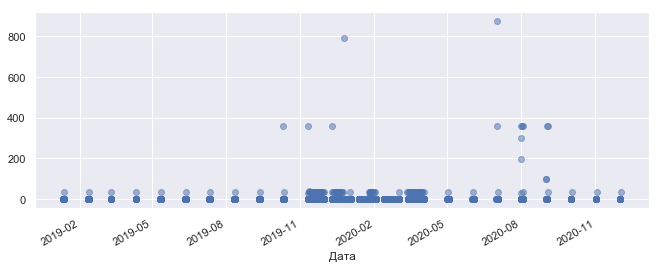

In [63]:
sns.set(rc={'figure.figsize':(11, 4)})
df['Стоимость, руб.'].plot(marker='o', alpha=0.5, linestyle='None');

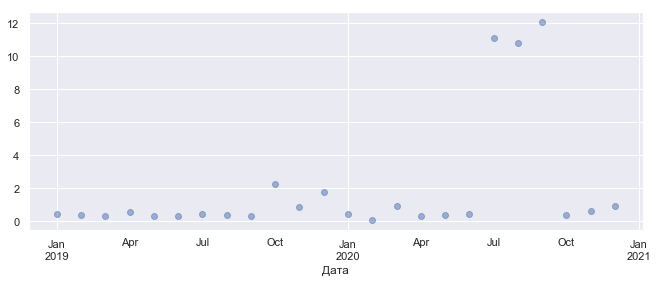

In [66]:
df_month = df['Стоимость, руб.'].resample('M').mean()
df_month.plot(marker='o', alpha=0.5, linestyle='None')

KeyError: 'Стоимость, руб.'

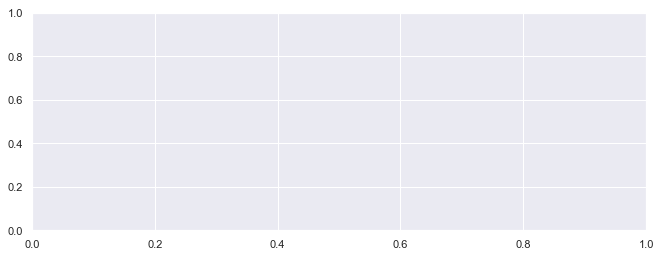

In [58]:
# Start and end of the date range to extract
start, end = '2019-02', '2020-04'

# Plot daily, weekly resampled, and 7-day rolling mean time series together
fig, ax = plt.subplots()

#ax.plot(df['Стоимость, руб.'],marker='.', linestyle='-', linewidth=0.5, label='Daily')

ax.plot(df_month['Стоимость, руб.'],marker='o', markersize=8, linestyle='-', label='Month Mean')


#ax.set_ylabel('Solar Production (GWh)')
ax.legend();

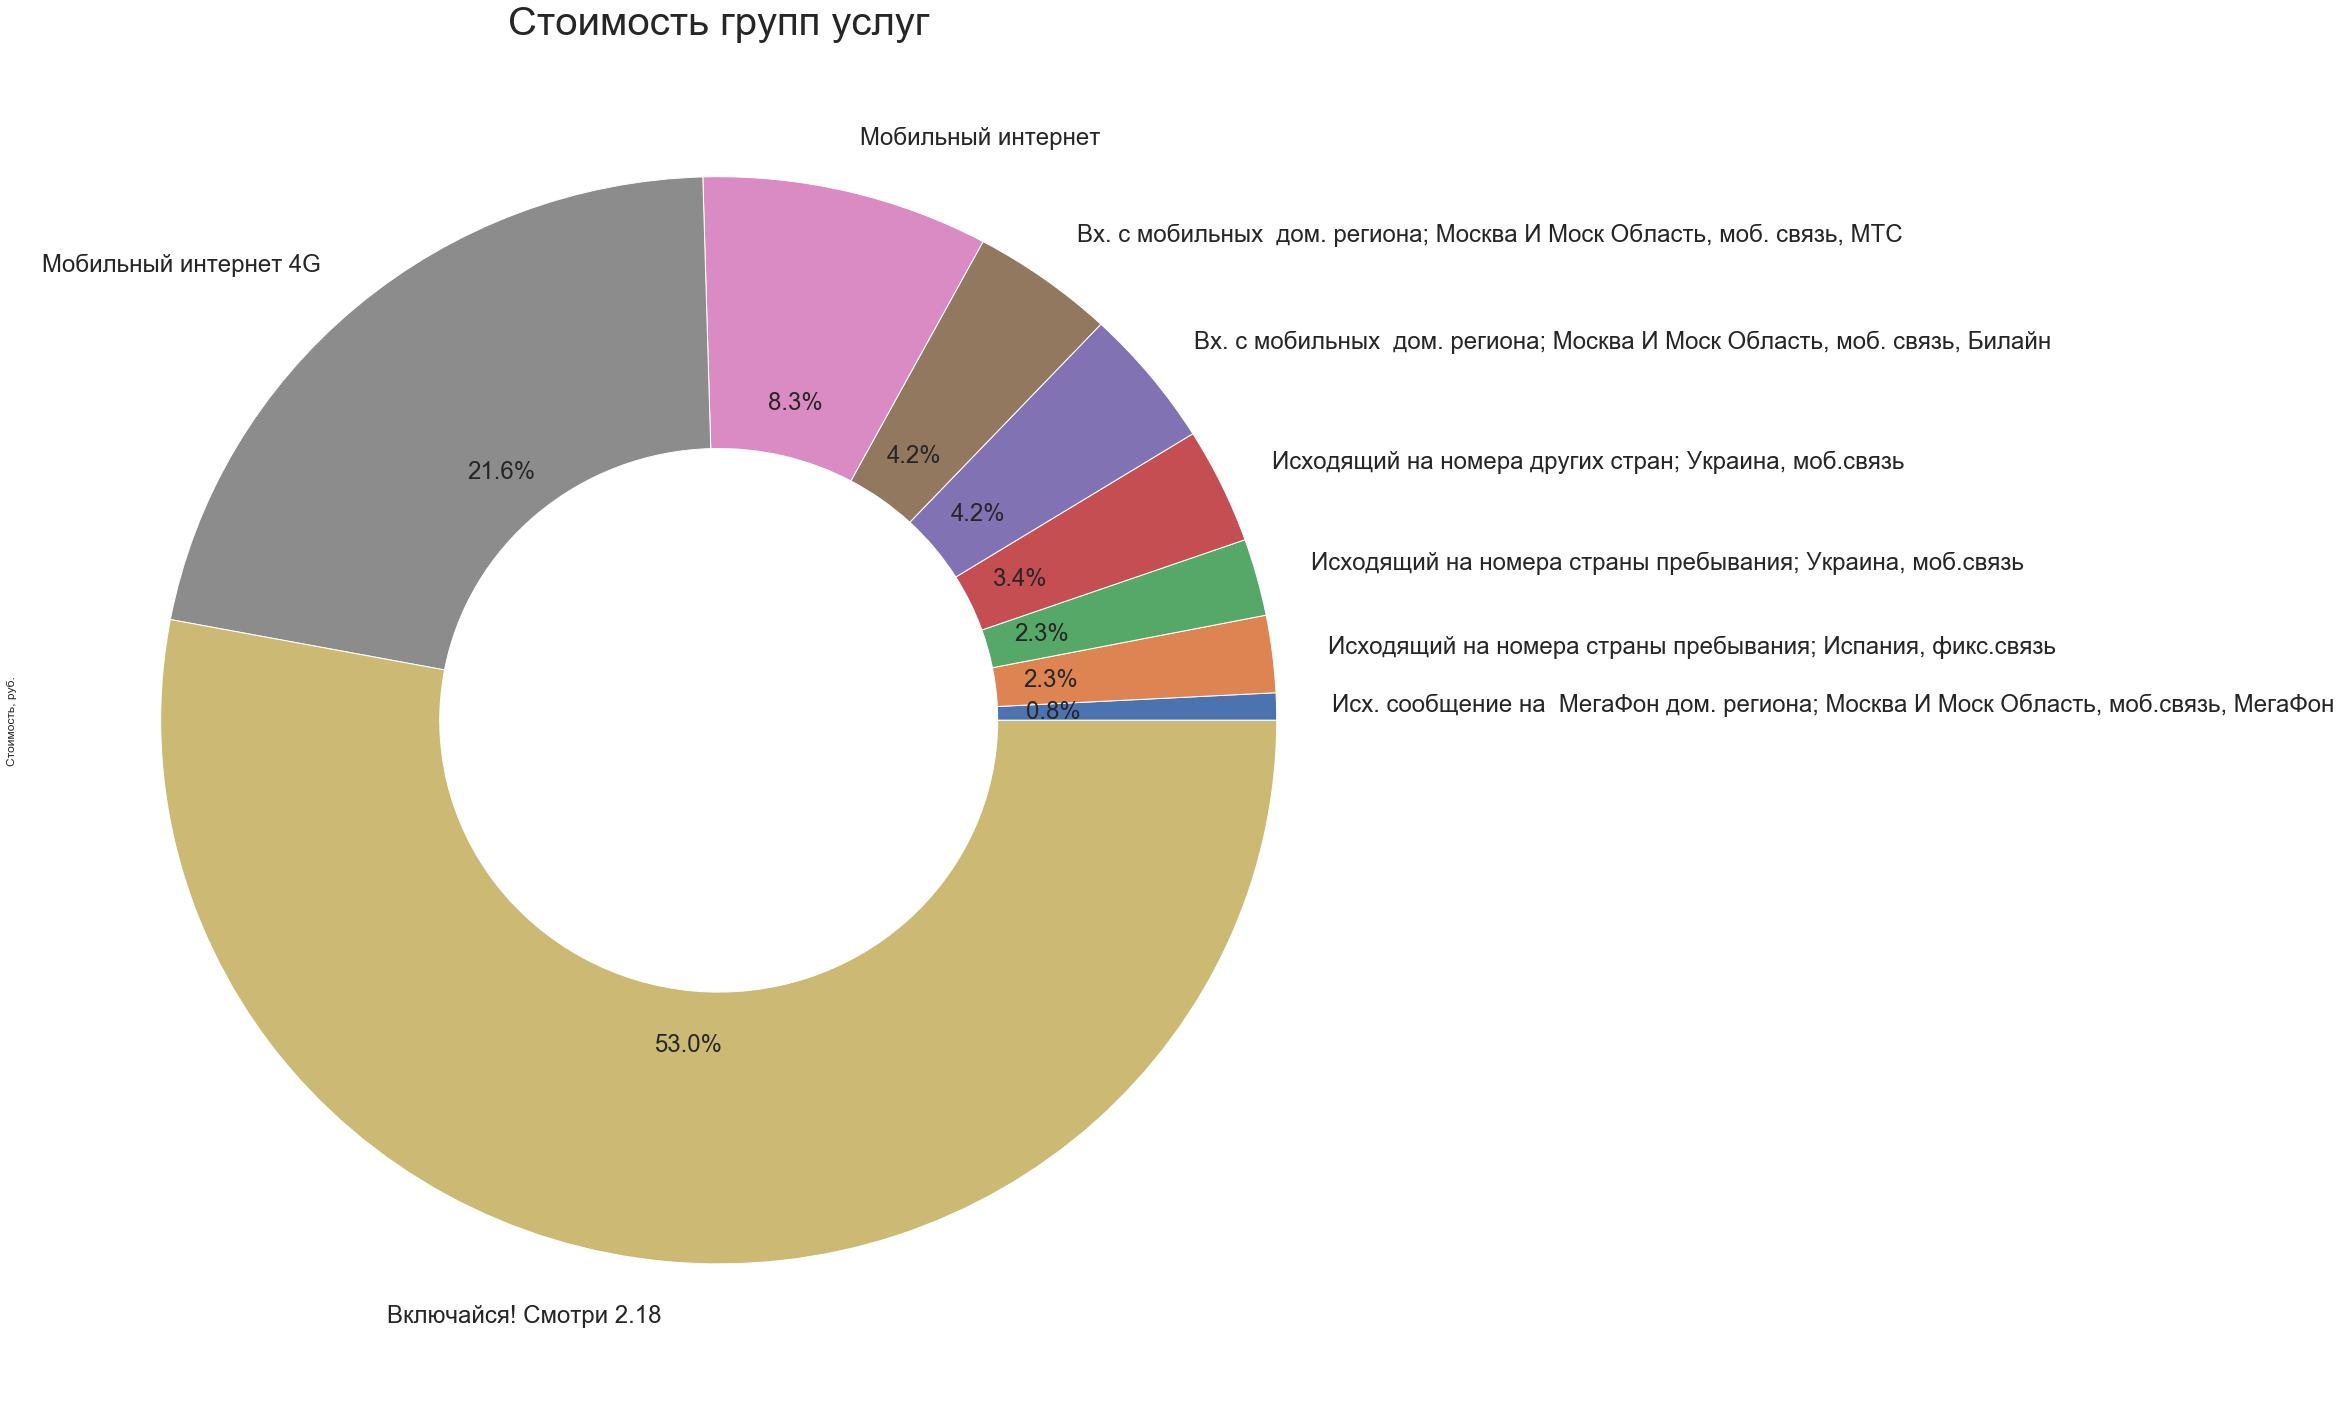

In [9]:
dftype = df.groupby(['Вид услуги']).sum().sort_values(by = ['Стоимость, руб.'])
costs = dftype[dftype['Стоимость, руб.'] > max(dftype['Стоимость, руб.'])/100]

costs.plot.pie(y='Стоимость, руб.', figsize=(25, 25),startangle=0, autopct='%.1f%%', 
              wedgeprops=dict(width=0.5), textprops={'fontsize': 24}, legend=None)

plt.title("Стоимость групп услуг", fontsize=40);

4270.45

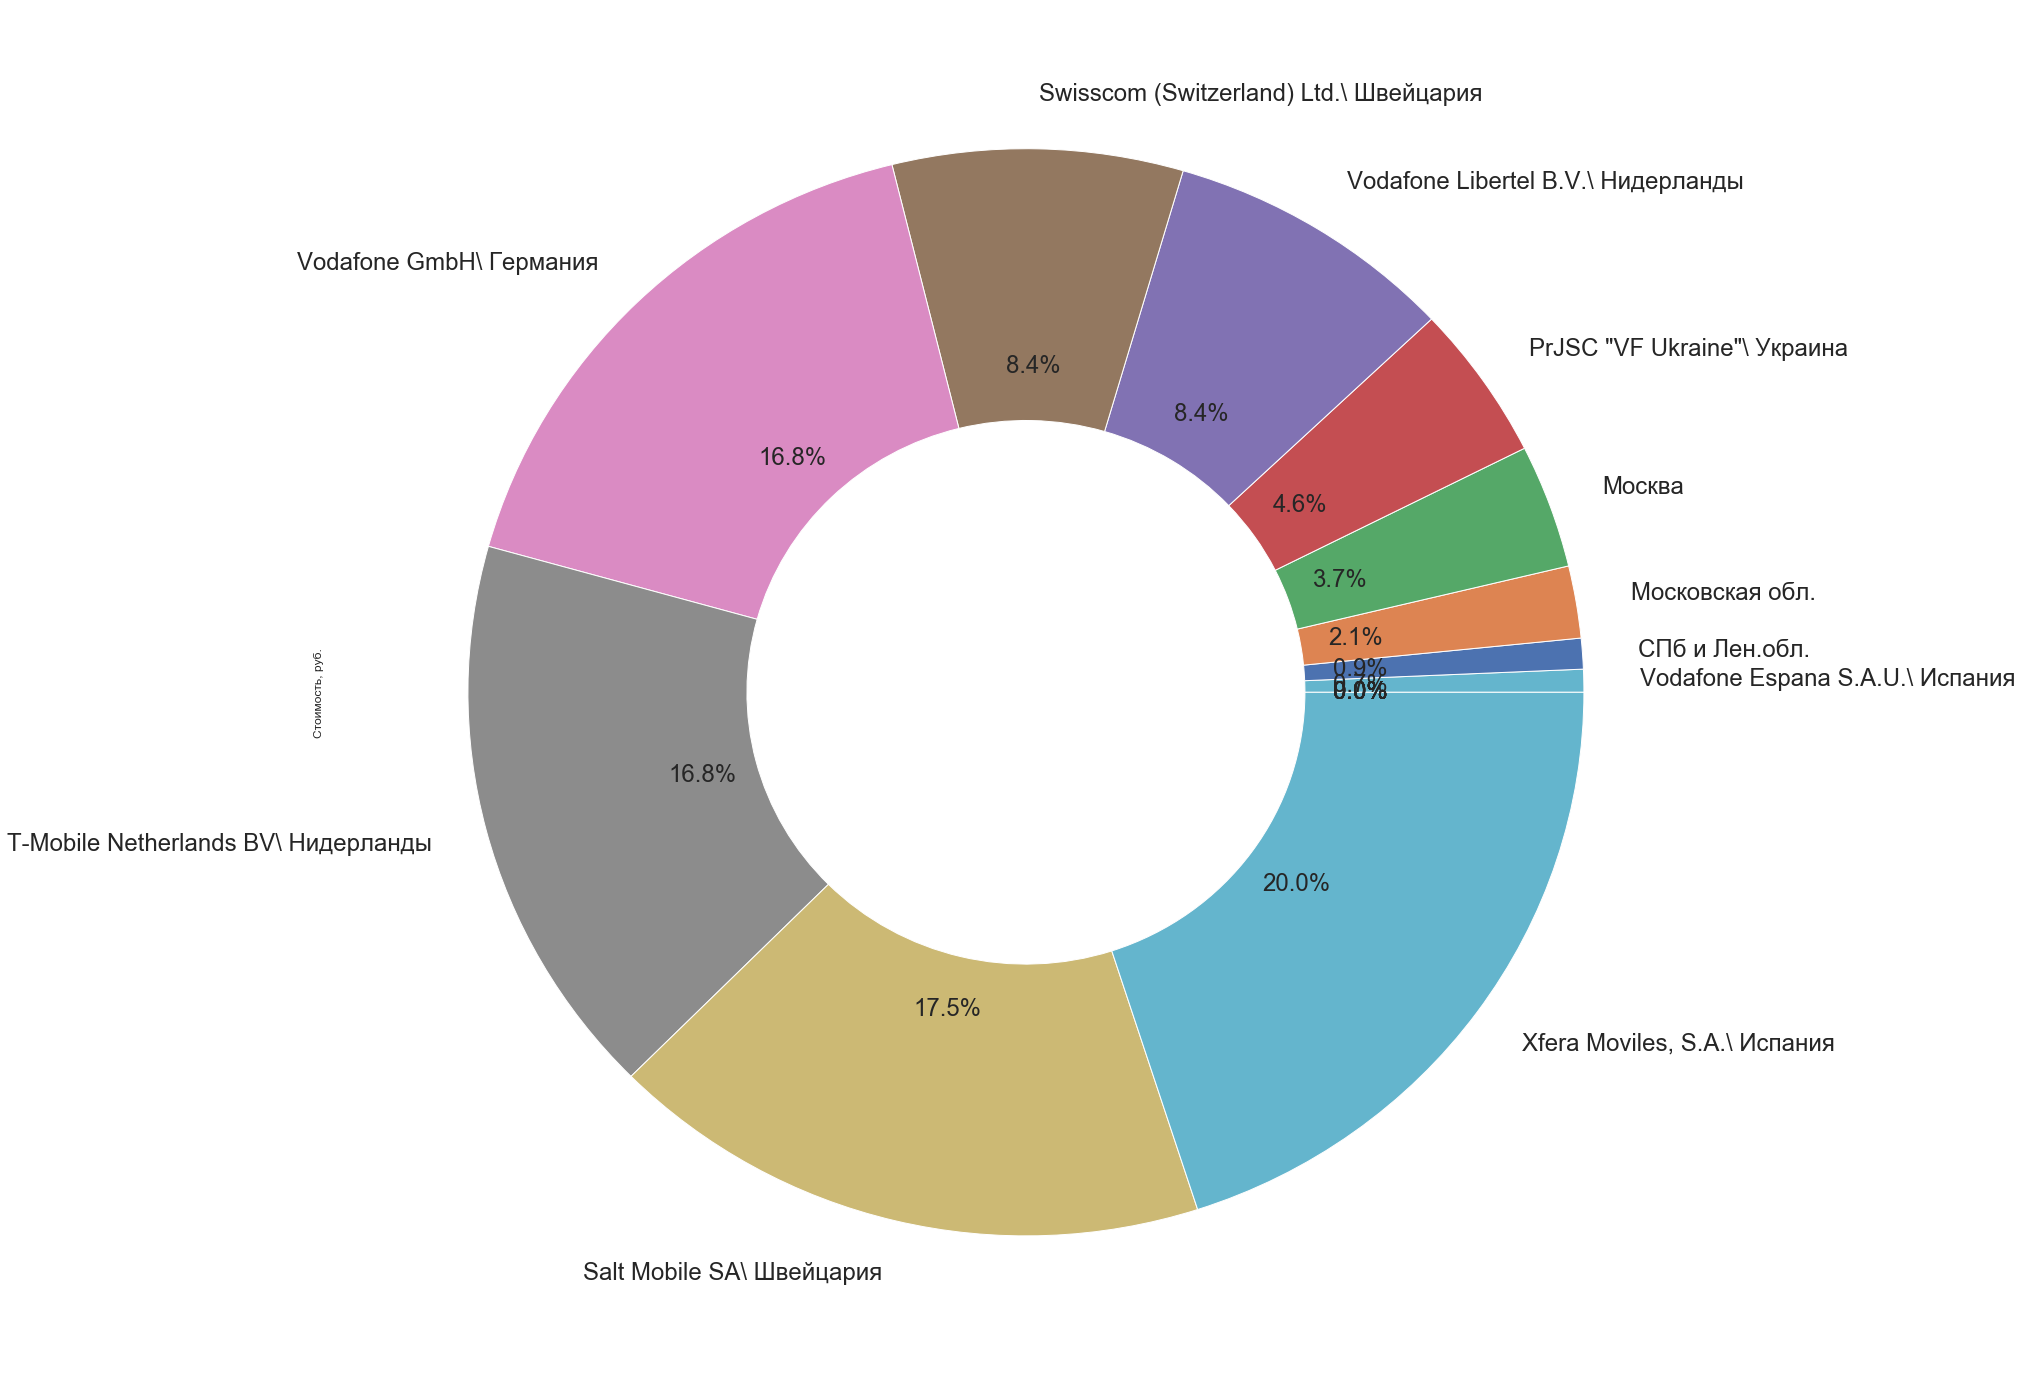

In [10]:
#Сколько я поратила по регионам?
dfrg = df.groupby(['Местонахождение при использовании услуги']).sum().sort_values(by = ['Стоимость, руб.'])
dfrg.plot.pie(y='Стоимость, руб.', figsize=(25, 25),startangle=0, autopct='%.1f%%', 
              wedgeprops=dict(width=0.5), textprops={'fontsize': 24}, legend=None)

dfrg['Стоимость, руб.'].sum()

In [9]:
len(df['Вид услуги'].unique())

85